In [11]:
using Plots;
using PlotThemes;
theme(:orange);

In [12]:
# Parameters
nx = 50
ny = 50
nt  = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

# Initial Conditions
p = zeros(nx, ny)
pd = zeros(nx, ny)
b = zeros(nx, ny)

x = range(xmin, stop=xmax, length=nx)
y = range(ymin, stop=ymax, length=ny)

# source locations
# select 2 random locations within the domain
x1 = rand(1:nx)
y1 = rand(1:ny)
x2 = rand(1:nx)
y2 = rand(1:ny)
b[x1, y1] = 100
b[x2, y2] = -100

-100

In [36]:
# create a function to calculate the poissons equation in 2D for pseudo-time nt
function poisson2D(p, b, nt, dx, dy)
    for n in 1:nt
        pd = copy(p)
        p[2:end-1, 2:end-1] .= (dy^2 * (pd[3:end, 2:end-1] + pd[1:end-2, 2:end-1]) + 
                              dx^2 * (pd[2:end-1, 3:end] + pd[2:end-1, 1:end-2]) - 
                              b[2:end-1, 2:end-1] * dx^2 * dy^2) / (2 * (dx^2 + dy^2))
    # p = 0 at all boundaries
    p[:, 1] .= 0
    p[:, end] .= 0
    p[1, :] .= 0
    p[end, :] .= 0
    end
    return p
end

poisson2D (generic function with 1 method)

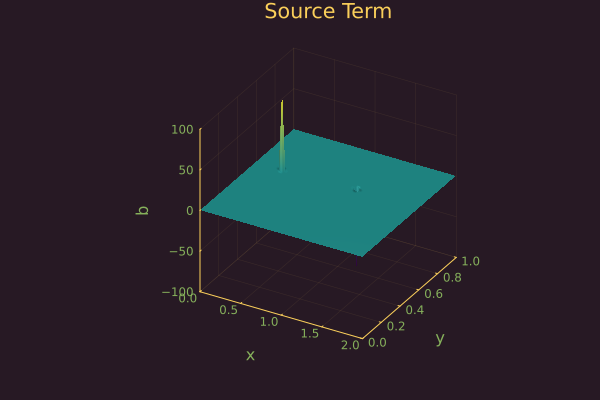

In [37]:
# plot the source term
surface(x, y, b, title="Source Term", xlabel="x", ylabel="y", zlabel="b", legend = false)

In [38]:
p = poisson2D(p, b, nt, dx, dy);

┌ Info: Saved animation to /tmp/jl_sDWx8zCJ4z.gif
└ @ Plots /home/fuad/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_sDWx8zCJ4z.gif")
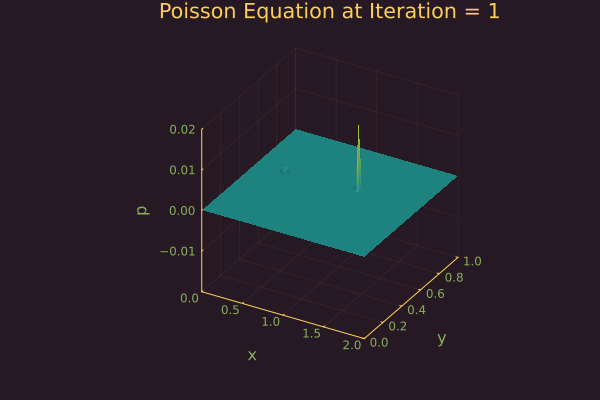

In [43]:
# now plot the solution for every pseudo-time step in the range 1:nt with gif
# replaced value of nt with 100
@gif for n in 1:200
    p = poisson2D(zeros(nx, ny), b, n, dx, dy)
    surface(x, y, p, title="Poisson Equation at Iteration = $n", xlabel="x", ylabel="y", zlabel="p", legend = false)
    zlims!((-0.02, 0.02))
end